# BigEarthNetV2 Dataset

## Intro

BigEarthNet v2.0 [Clasen et al. 2025](https://arxiv.org/abs/2407.03653) is a large-scale multi-modal satellite image dataset for multi-label land cover classification. The dataset contains Sentinel-1 SAR and Sentinel-2 optical imagery with multi-label annotations based on the CORINE Land Cover (CLC) labels. In comparison to v1.0, the v2.0 release provides improved hierarchical multi-label annotations, enhanced data quality, and geospatial splits. It can be used to evaluate multi-label classification and data fusion (SAR + Optical) data fusion schemes.

## Dataset Characteristics

- **Modalities**: 
  - Sentinel-1 SAR (VV, VH polarizations)
  - Sentinel-2 Optical (12 spectral bands)
- **Spatial Resolution**: 
  - S1: 10m ground sample distance
  - S2: 10m, 20m, 60m (resampled to 10m)
- **Temporal Resolution**: Single acquisition per patch
- **Spectral Bands**: 
  - S2: 12 bands (B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B11, B12)
  - S1: 2 polarizations (VV, VH)
- **Image Dimensions**: 120x120 pixels (1.2km x 1.2km patches)
- **Labels**: 19 CORINE Land Cover classes (multi-label)
- **Geographic Distribution**: 10 European countries
- **Temporal Coverage**: June 2017 - May 2018

## Dataset Setup and Initialization

In [ ]:
from pathlib import Path

from geobench_v2.datamodules import GeoBenchBENV2DataModule

# Setup paths
PROJECT_ROOT = Path("../../")

# Initialize datamodule
datamodule = GeoBenchBENV2DataModule(
    img_size=120,  # Original resolution
    batch_size=16,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "benv2",
    download=True,
)
datamodule.setup("fit")
datamodule.setup("test")

print("BigEarthNet v2.0 datamodule initialized successfully!")
print(f"Training samples: {len(datamodule.train_dataset)}")
print(f"Validation samples: {len(datamodule.val_dataset)}")
print(f"Test samples: {len(datamodule.test_dataset)}")

Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
BigEarthNet v2.0 datamodule initialized successfully!
Training samples: 20000
Validation samples: 4000
Test samples: 4000


## Geographic Distribution Visualization

The geospatial split patterns were kept from the original dataset release, see Figure 3 of [Clasen et al. 2025](https://arxiv.org/abs/2407.03653).

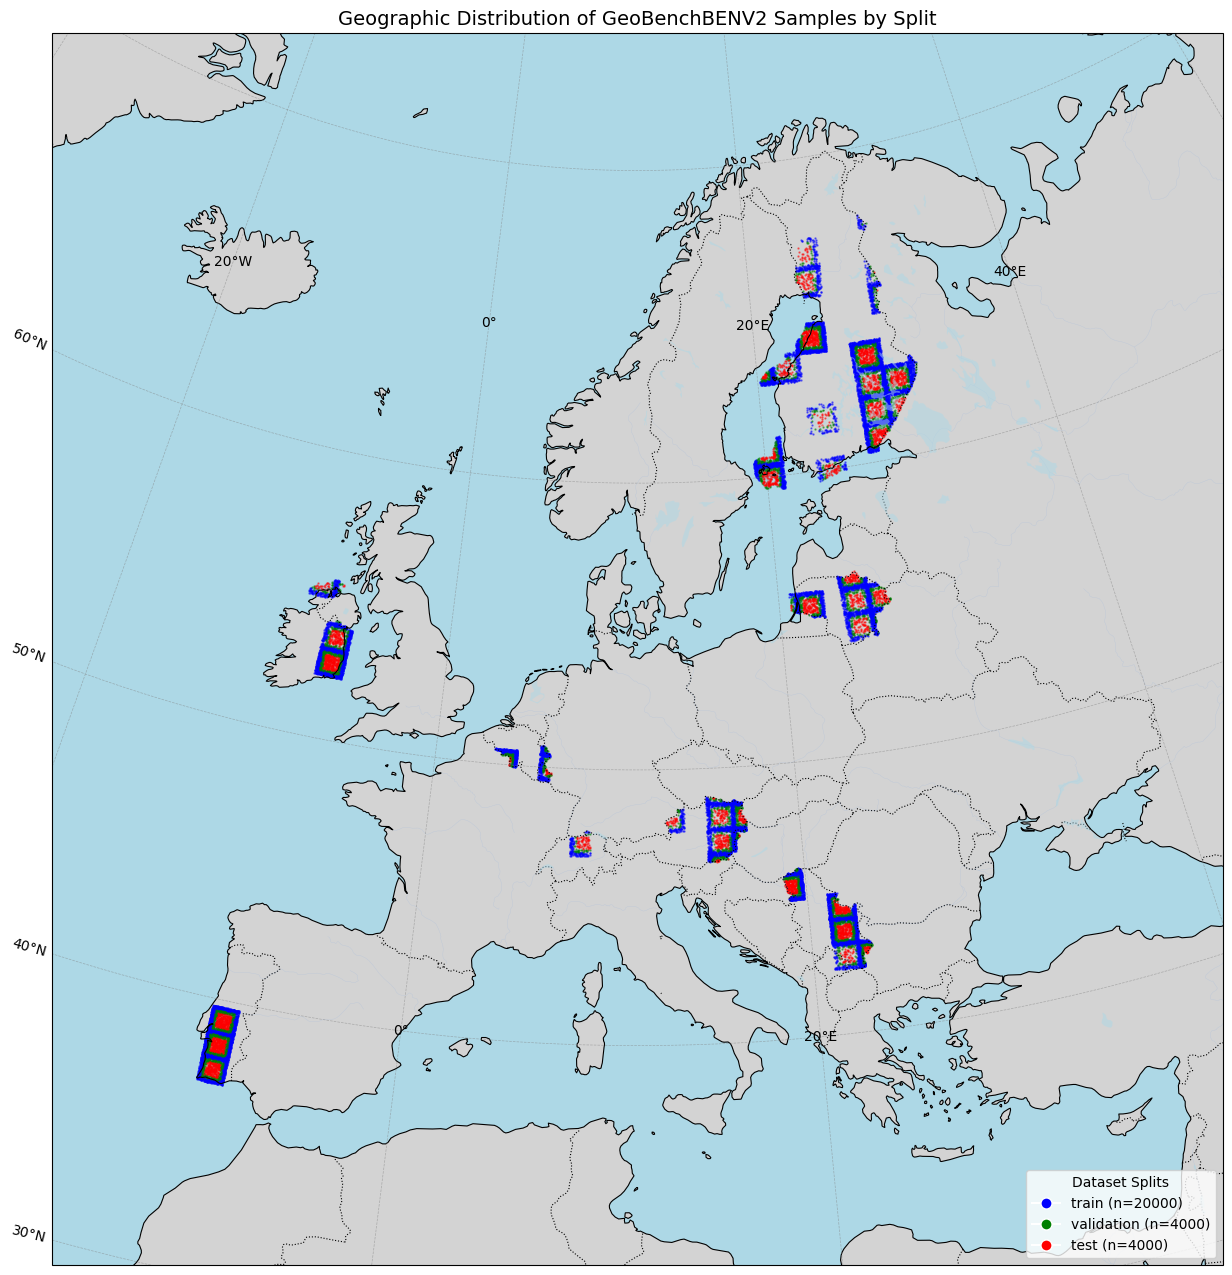

In [2]:
geo_fig = datamodule.visualize_geospatial_distribution()

## Sample Data Visualization

The dataset combines multi-modal satellite observations with multi-label land cover annotations. Each sample contains co-registered Sentinel-1 SAR and Sentinel-2 optical imagery:

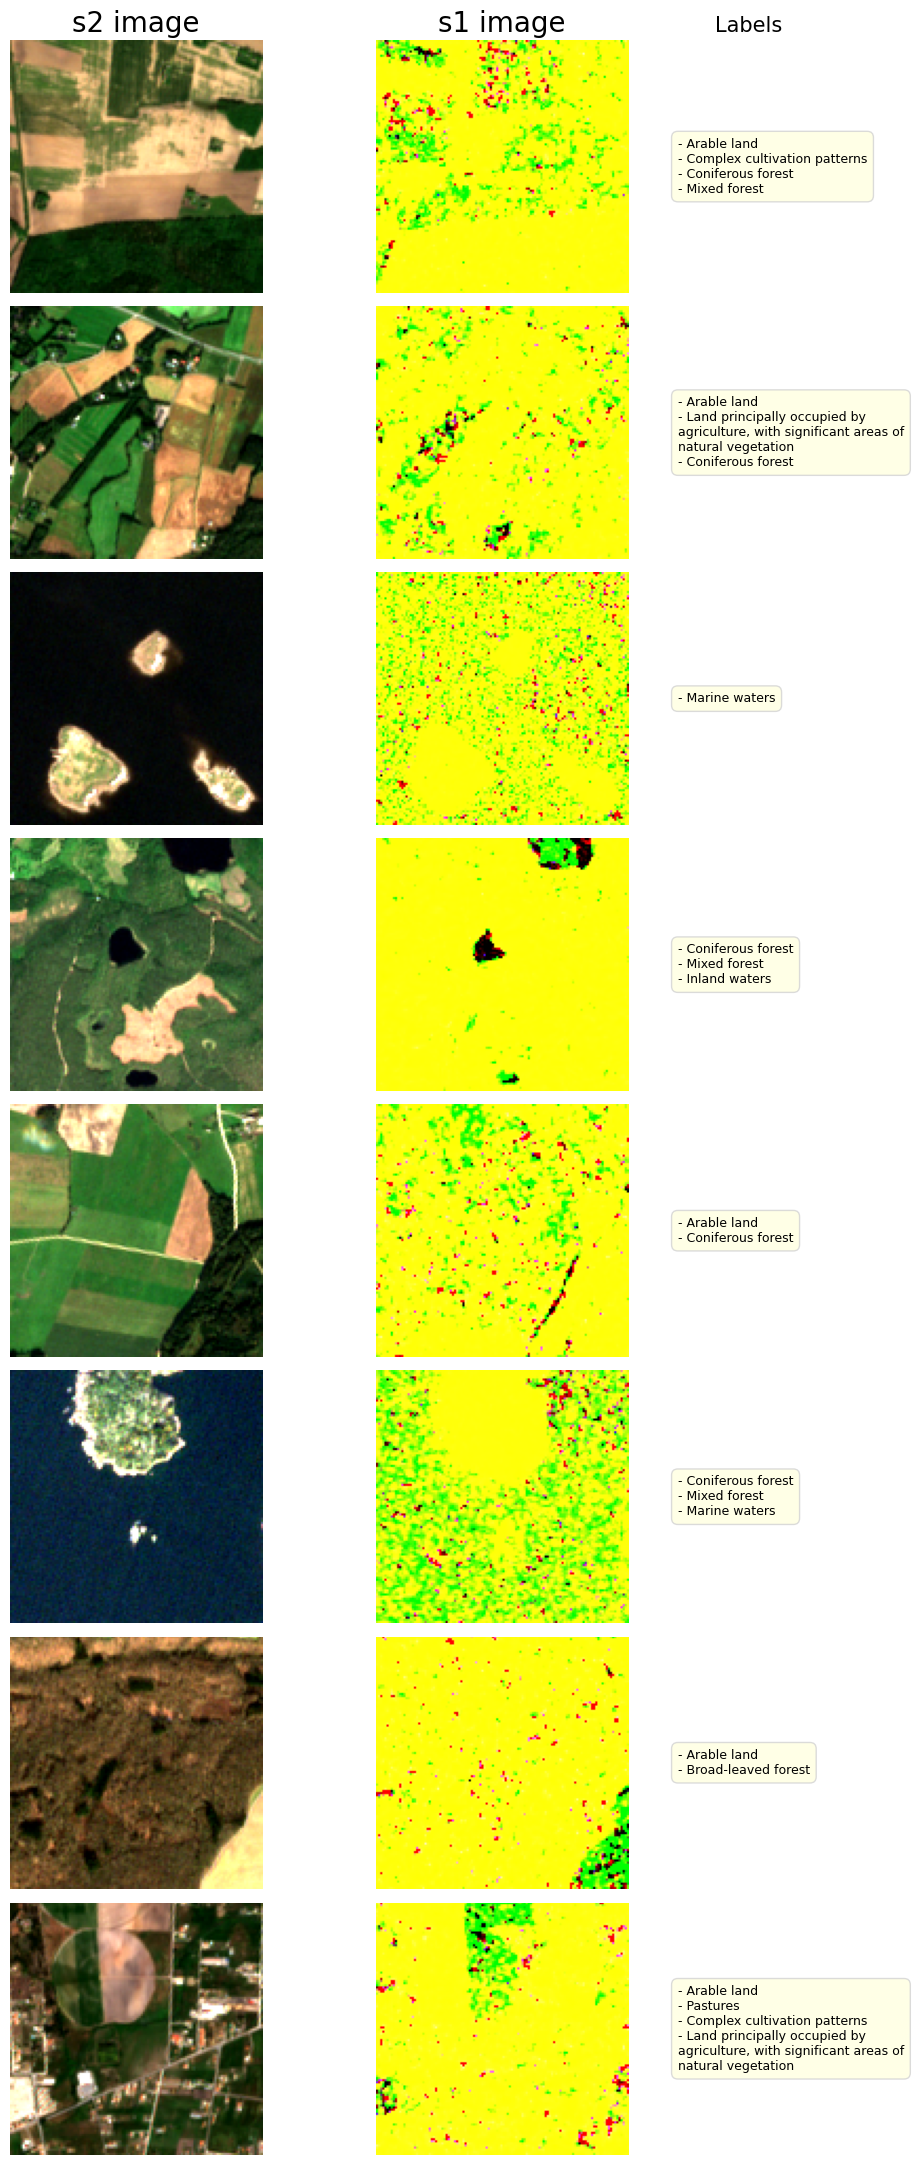

In [3]:
fig, batch = datamodule.visualize_batch()

## GeoBenchV2 Processing Pipeline

### Preprocessing Steps

1. **Split Generation**:
   - Used existing train/validation/test splits from original dataset
   - Created additional test subset from training data for extended evaluation

2. **Dataset Subsampling**:
    - The final version consists of
        - 20,000 training samples
        - 4,000 validation samples
        - 4,000 test samples

## References

1. K. Clasen, L. Hackel, T. Burgert, G. Sumbul, B. Demir, V. Markl, " reBEN: Refined BigEarthNet Dataset for Remote Sensing Image Analysis ", IEEE International Geoscience and Remote Sensing Symposium (IGARSS), 2025. https://arxiv.org/abs/2407.03653

2. Original Dataset Download: http://bigearth.net/

3. CORINE Land Cover: https://land.copernicus.eu/pan-european/corine-land-cover